In [1]:
# Importing Libraries

import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn import linear_model, preprocessing 

In [2]:
# Assigning the content of the 'car.data' csv file to a panda DataFrame named 'data'
data = pd.read_csv("car.data")
# Prints the first five lines of the 'data' DataFrame
print(data.head())

  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc


In [3]:
# [C] Encodes labels into appropriate interger values
le = preprocessing.LabelEncoder()

In [4]:
# [C] Gets the columns and turns them into lists before transforming them into the appropriate interger values
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
door = le.fit_transform(list(data["door"]))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
cls = le.fit_transform(list(data["class"]))

In [5]:
# [C] Combines the labels and lists into feature and label lists 
X = list(zip(buying, maint, door, persons, lug_boot, safety))  # features
y = list(cls)  # labels

In [6]:
# [C] Splits data into testing and training sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

# Training a KNN Classifier

In [7]:
# [C] Imports the 'KNeighborsClassifier' from the scikit learn library, used for classification tasks and implements the k-nearest neighbours algorithim
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=9)

In [8]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [9]:
# [C] Calculates the accuracy of the model on the provided test data
acc = model.score(x_test, y_test)
print(acc)

0.930635838150289


In [10]:
# [C] Used to make predictions based off the test data
predicted = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predicted)):
    print("Predicted: ", names[predicted[x]], "Data: ", x_test[x], "Actual: ", names[y_test[x]])

# This will display the predicted class, our data and the actual class
# We create a names list so that we can convert our integer predictions into 
# their string representation 

Predicted:  unacc Data:  (0, 2, 2, 1, 0, 2) Actual:  unacc
Predicted:  unacc Data:  (3, 2, 2, 2, 1, 2) Actual:  unacc
Predicted:  good Data:  (0, 0, 3, 0, 1, 0) Actual:  good
Predicted:  good Data:  (1, 2, 1, 2, 0, 1) Actual:  good
Predicted:  unacc Data:  (1, 0, 3, 2, 1, 2) Actual:  unacc
Predicted:  good Data:  (2, 0, 2, 1, 0, 1) Actual:  good
Predicted:  good Data:  (3, 2, 0, 2, 0, 2) Actual:  unacc
Predicted:  good Data:  (3, 2, 3, 2, 1, 1) Actual:  good
Predicted:  good Data:  (1, 0, 2, 2, 2, 1) Actual:  good
Predicted:  good Data:  (2, 2, 0, 1, 2, 2) Actual:  unacc
Predicted:  good Data:  (1, 3, 1, 0, 0, 2) Actual:  good
Predicted:  good Data:  (0, 1, 1, 0, 2, 0) Actual:  good
Predicted:  good Data:  (0, 1, 3, 0, 1, 1) Actual:  good
Predicted:  good Data:  (0, 2, 1, 2, 2, 1) Actual:  good
Predicted:  good Data:  (2, 0, 3, 0, 0, 2) Actual:  good
Predicted:  good Data:  (2, 0, 0, 1, 0, 2) Actual:  unacc
Predicted:  unacc Data:  (0, 1, 2, 1, 1, 0) Actual:  unacc
Predicted:  good Dat

In [11]:
# [C] Iterates over each instance in the test set, makes predictions, and then prints out the predicted class
predicted = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predicted)):
    print("Predicted: ", names[predicted[x]], "Data: ", x_test[x], "Actual: ", names[y_test[x]])

    n = model.kneighbors([x_test[x]], 9, True)
    print("N: ", n)

Predicted:  unacc Data:  (0, 2, 2, 1, 0, 2) Actual:  unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[1010,  316, 1530, 1369, 1553,  301,  694,  803,  278]]))
Predicted:  unacc Data:  (3, 2, 2, 2, 1, 2) Actual:  unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 331, 1110, 1167, 1275,  800,  781, 1060,  431, 1334]]))
Predicted:  good Data:  (0, 0, 3, 0, 1, 0) Actual:  good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[1001, 1376,   56, 1249, 1291,  200,  492,  122, 1246]]))
Predicted:  good Data:  (1, 2, 1, 2, 0, 1) Actual:  good
N:  (array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]]), array([[ 430, 1209, 1441,  378,  952,  920, 1461,  479,  748]]))
Predicted:  unacc Data:  (1, 0, 3, 2, 1, 2) Actual:  unacc
N

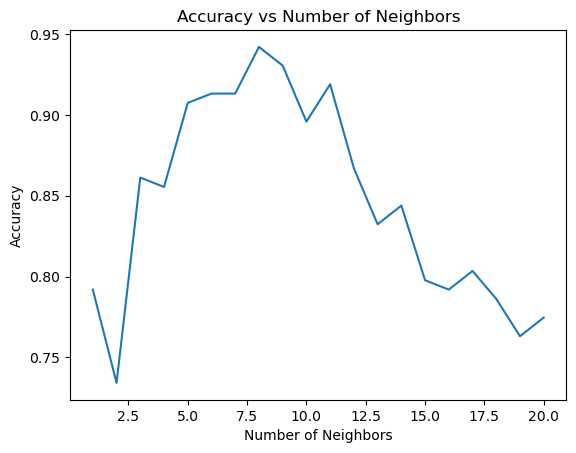

In [12]:
# [C] Creates a graph
neighbors = range(1, 21)  # Vary the number of neighbors from 1 to 20
accuracies = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    accuracies.append(acc)

pyplot.plot(neighbors, accuracies)
pyplot.xlabel('Number of Neighbors')
pyplot.ylabel('Accuracy')
pyplot.title('Accuracy vs Number of Neighbors')
pyplot.show()